<h1> DS200A Computer Vision Assignment</h1>

<h2>  Part Two: Feature Selection </h2>	


<h4> In this section, we would like you to select between 15 and 20 features to focus your model on. This will require significant explatoratory research. The first one is already implemented for you, and the next two are pre-specified.  </h4>

### Import Libraries

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_doh, peak_local_max
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage import filters 

import seaborn as sns 
import scipy
import scipy.cluster
import binascii
import os
import time 

# External libraries not part of Jupyter dependencies 
!pip install opencv-python     
import cv2
!pip install webcolors
import webcolors 
!pip install Pillow
from PIL import Image

  Using cached https://files.pythonhosted.org/packages/1d/44/c4902683be73beba20afd299705e11f0a753a01cc7f9d6a070841848605b/webcolors-1.8.1-py2.py3-none-any.whl


### Helper Function Fetches Cleaned Images From Part 1 

In [2]:
def get_cleaned_images(isTest=False):
    """
    Returns the cleaned training or validation set images.
    
    Keyword arguments: 
    isTest (bool) -- test set if True, train set if False. 
    
    Returns: 
        pd.DataFrame with cleaned images. 
    """
    cache_name = 'cleaned_test.pkl' if isTest else 'cleaned_train.pkl'
        
    if Path(cache_name).is_file():
        image_df = pd.read_pickle(cache_name)
        print(f"Success: {len(image_df)} images loaded into {'test' if isTest else 'train'} dataframe")
        return image_df
    else:
        print("Error: data file does not exist. Please create it in part 1!")

training_data = get_cleaned_images()
validation_data = get_cleaned_images(isTest=True)

Success: 1501 images loaded into train dataframe
Success: 716 images loaded into test dataframe


### Image Feature Functions

In [3]:
def ft0(images):
    """ Returns the pixel size of the image arrays"""
    return images.size

def ft1(images):
    """ Returns the average of the red-channel in image array """
    red_channel = images[:, :, 0]
    return np.mean ( red_channel )
    
def ft2(images): 
    """ Returns aspect ratio of the image arrays """
    return images.shape[1] / images.shape[0]

def ft3(images):
    """ Returns the average of the green-channel in image array """
    green_channel = images[:, :, 1]
    return np.mean ( green_channel )
        
def ft4(images):
    """ Returns the average of the blue-channel in image array """
    blue_channel = images[:, :, 2]
    return np.mean ( blue_channel )

def ft5(images):
    """ Returns the median of the red-channel in image array """
    red_channel = images[:, :, 0]
    return np.median ( red_channel )

def ft6(images):
    """ Returns the median of the green-channel in image array """
    green_channel = images[:, :, 1]
    return np.median ( green_channel )
    
def ft7(images):
    """ Returns the median of the blue-channel in image array """
    blue_channel = images[:, :, 2]
    return np.median ( blue_channel )

def ft8(images):
    """ Returns the stdev of the red-channel in image array """
    red_channel = images[:, :, 0]
    return np.std ( red_channel )
    
def ft9(images):
    """ Returns the stdev of the green-channel in image array """
    green_channel = images[:, :, 1]
    return np.std ( green_channel )

def ft10(images):
    """ Returns the stdev of the blue-channel in image array """
    blue_channel = images[:, :, 2]
    return np.std ( blue_channel )
    
def ft11(images):
    """Returns the mean luminance for the images in the array """
    return np.mean(rgb2gray(images))

def ft12(images):
    """Returns the median luminance for the image array"""
    return np.mean(rgb2gray(images))

def ft13(images):
    """ Returns the stdev luminance for the images """
    return np.std(rgb2gray(images))

def ft14(images):
    """ Returns number of interest points in image using ORB """
    # initiate STAR detector
    orb = cv2.ORB_create() 
    
    # find keypoints with ORB
    keypoints = orb.detect(images, None) 
    
    # compute descriptors with ORB
    keypoints, des = orb.compute(images, keypoints) 
    return len(keypoints)


def ft15(images):
    """ Returns number of blobs (i.e. connected areas) in images using Hessian """
    image_gray = rgb2gray(images)
    blobs_hessian = blob_doh(image_gray, 
                             max_sigma=30, 
                             threshold= 0.01)
    return len(blobs_hessian)

def ft16(images):
    """Returns number of peaks (i.e. local max in a region) of images """
    local_max_coordinates = peak_local_max(images)
    return len(local_max_coordinates)

def ft17(images):
    """
    Returns the average luminance of the filtered images.
    This is used to approximate the amount of edges in the image
    """
    return np.mean(filters.sobel(rgb2gray(images)))

### Simple Feature Function Unit Tests 

In [4]:
def test_ft1(image):
    assert ft1(image) == np.mean([2,4,10,12,20,40,100,120]), \
        f"Answer received: {ft1(image)}, Answer expected:{np.mean([2,4,10,12,20,40,100,120])}"
    print("PASS ft1 test")

def test_ft2(image):
    assert ft2(image) == 2, \
        f"Answer received: {ft2(image)}, Answer expected: 2"
    print("PASS ft2 test")
    
def test_ft3(image):
    assert ft3(image) == np.mean([0,0,1,3,4,5,5,6]), \
        f"Answer received: {ft3(image)}, Answer expected:{np.mean([0,0,1,3,4,5,5,6])}"
    print("PASS ft3 test")
    
def test_ft4(image):
    assert ft4(image) == np.mean([5,5,6,7,7,8,9,10]), \
        f"Answer received: {ft4(image)}, Answer expected:{np.mean([5,5,6,7,7,8,9,10])}"    
    print("PASS ft4 test")

def test_ft5(image):
    assert ft5(image) == np.median([2,4,10,12,20,40,100,120]), \
        f"Answer received: {ft5(image)}, Answer expected:{np.mean([2,4,10,12,20,40,100,120])}"
    print("PASS ft5 test")

def test_ft6(image):
    assert ft6(image) == np.median([0,0,1,3,4,5,5,6]), \
        f"Answer received: {ft6(image)}, Answer expected:{np.median([0,0,1,3,4,5,5,6])}"
    print("PASS ft6 test")

def test_ft7(image):
    assert ft7(image) == np.median([5,5,6,7,7,8,9,10]), \
        f"Answer received: {ft7(image)}, Answer expected:{np.median([5,5,6,7,7,8,9,10])}"  
    print("PASS ft7 test") 

def test_ft8(image):
    assert ft8(image) == np.std([2,4,10,12,20,40,100,120]), \
        f"Answer received: {ft8(image)}, Answer expected:{np.std([2,4,10,12,20,40,100,120])}" 
    print("PASS ft8 test")

def test_ft9(image):
    assert ft9(image) == np.std([0,0,1,3,4,5,5,6]), \
        f"Answer received: {ft9(image)}, Answer expected:{np.std([0,0,1,3,4,5,5,6])}" 
    print("PASS ft9 test")

def test_ft10(image):
    assert ft10(image) == np.std([5,5,6,7,7,8,9,10])  , \
        f"Answer received: {ft10(image)}, Answer expected:{np.std([5,5,6,7,7,8,9,10])}" 
    print("PASS ft10 test")  

In [5]:
def run_all_tests():
    """ Runs our simple feature function test suite on an image """
    image = np.array([[ [2, 0, 5],
                    [4, 0, 5],
                    [10, 1, 6],
                    [12, 3, 7]],

                   [[20, 4, 7],
                    [40, 5, 8],
                    [100, 5, 9],
                    [120, 6, 10]]])
    test_ft1(image)
    test_ft2(image)
    test_ft3(image)
    test_ft4(image)
    test_ft5(image)
    test_ft6(image)
    test_ft7(image)
    test_ft8(image)
    test_ft9(image)
    test_ft10(image)
    print("----\nALL TESTS PASSED!")
    
run_all_tests()

PASS ft1 test
PASS ft2 test
PASS ft3 test
PASS ft4 test
PASS ft5 test
PASS ft6 test
PASS ft7 test
PASS ft8 test
PASS ft9 test
PASS ft10 test
----
ALL TESTS PASSED!


Define more features above, performing any EDA research below. We expect all external sources sited, and a couple significant different graphs indicating some form of EDA. 

### EDA Helper Functions used to find dominant color clusters from images ### 

Color distribution found by K-Means Clustering pixels into K groups of similar colors 

In [6]:
def closest_color(requested_color):
    """
    Finds the RGB color that is closed to the requested color.
    
    Keyword arguments: 
    requested_color (3-tuple) -- color to match. 
    
    Returns: 
        Closest RGB colour (3-tuple)
    """
    min_colors = {}
    for key, name in webcolors.css3_hex_to_names.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_color[0]) ** 2
        gd = (g_c - requested_color[1]) ** 2
        bd = (b_c - requested_color[2]) ** 2
        min_colors[(rd + gd + bd)] = name
    return min_colors[min(min_colors.keys())]

def get_color_name(requested_color):
    """
    Convert a color (3-tuple of ints) into its color name if it exists.
    
    Keyword arguments:
    requested_color -- color to match a name for.
    
    Returns: 
        name of color (string) 
    """
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_color)
    except ValueError:
        closest_name = closest_color(requested_color)
        actual_name = None
    return actual_name, closest_name

def get_color_name_from_image(image_path):
    """
    Finds the color distribution of the image,
    by K-Means clustering pixels into K groups of similar colors.
    
    Keyword arguments: 
    image_path -- path of the image 
    
    Returns: 
        color name of most domiant color (string) 
    """
    NUM_CLUSTERS = 5
    im = Image.open(image_path)
    im = im.resize((150, 150)) # optional, reduce time
    ar = np.asarray(im)
    shape = ar.shape
    ar = ar.reshape(scipy.product(shape[:2]), shape[2]).astype(float)
    codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)

    vecs, dist = scipy.cluster.vq.vq(ar, codes) # assign codes
    counts, bins = scipy.histogram(vecs, len(codes)) # count occurrences

    index_max = scipy.argmax(counts) # find most frequent
    peak = codes[index_max]
    input = ''.join(chr(int(c)) for c in peak)
    color = binascii.hexlify ( bytes(input, 'utf-8') )
    hex_code = "#" + str(color).replace('b', '').replace("'", "")
    _, color_name = get_color_name(peak)
    return color_name 

# Example 
get_color_name_from_image('20_categories_training/airplanes/airplanes_0017.jpg')

def get_dominant_colors(image_folder='20_categories_training', cache_file='./colors.pkl'): 
    """
    Returns the most dominant colors for all images in specified folder.
    
    Keyword arguments:
    image_folder (string) -- path of image folder specified from root.
    cache_file (string) -- name of file used to cache results locally. 
    
    Returns: 
        pd.DataFrame containing the most dominant color names of all images 
    """
    if Path(cache_file).is_file(): 
        return pd.read_pickle(cache_file)
    
    popular_colors = []
    for parent_dir, sub_dir, files in os.walk(image_folder):
        for file in files:
            if ' ' not in file and not file.startswith('.'): 
                file_path = os.path.join(parent_dir, file)
                try: 
                    dominant_color = get_color_name_from_image(file_path)
                    popular_colors.append(dominant_color)
                except: 
                    continue # RGB (3-tuple) invalid
    colors_df = pd.DataFrame(np.array(popular_colors), columns=['color'])                
    
    if not Path(cache_file).is_file(): 
        colors_df.to_pickle(cache_file)
    return colors_df

def ensure_dir(file_path):
    """
    Check if directory exists or create it.
    This is used to to store cached color files.
    """
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)

### EDA Visualizations 

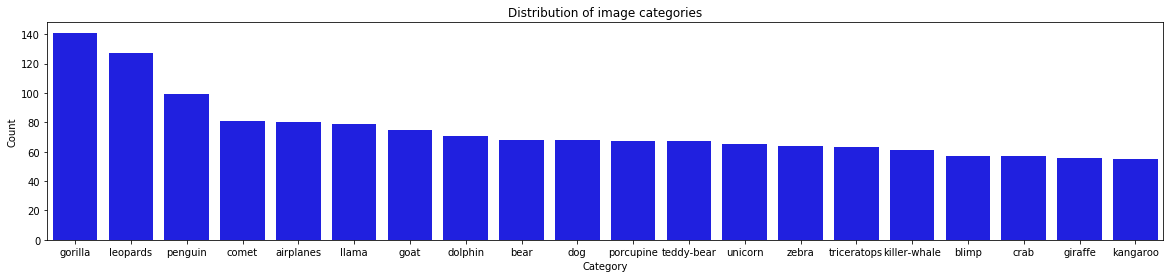

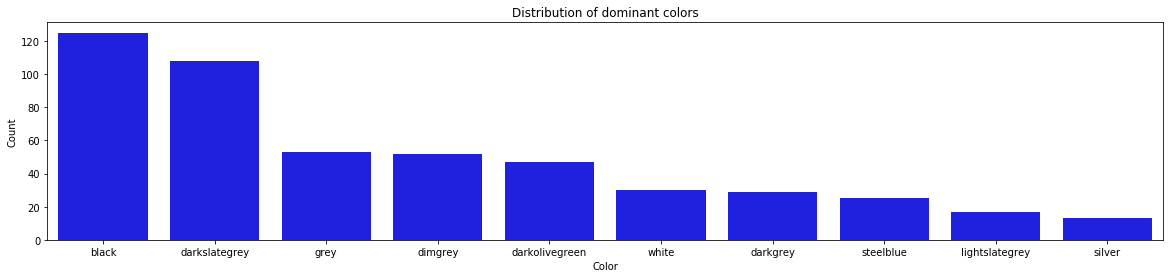

Finding dominant colors for category: airplanes
Finding dominant colors for category: bear
Finding dominant colors for category: blimp
Finding dominant colors for category: comet
Finding dominant colors for category: crab
Finding dominant colors for category: dog
Finding dominant colors for category: dolphin
Finding dominant colors for category: giraffe
Finding dominant colors for category: goat
Finding dominant colors for category: gorilla
Finding dominant colors for category: kangaroo
Finding dominant colors for category: killer-whale
Finding dominant colors for category: leopards
Finding dominant colors for category: llama
Finding dominant colors for category: penguin
Finding dominant colors for category: porcupine
Finding dominant colors for category: teddy-bear
Finding dominant colors for category: triceratops
Finding dominant colors for category: unicorn
Finding dominant colors for category: zebra


<Figure size 432x288 with 0 Axes>

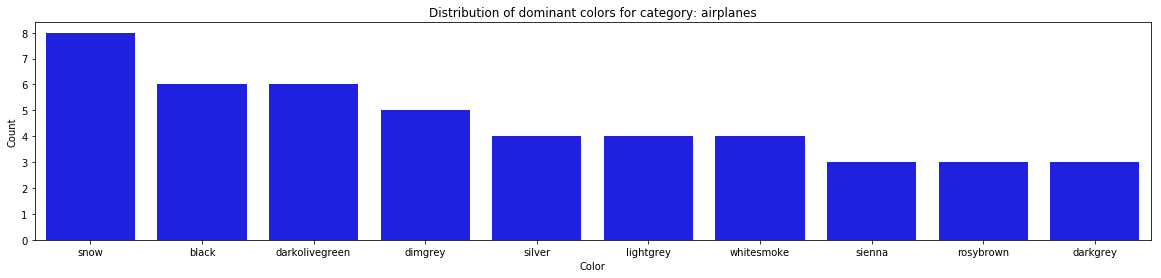

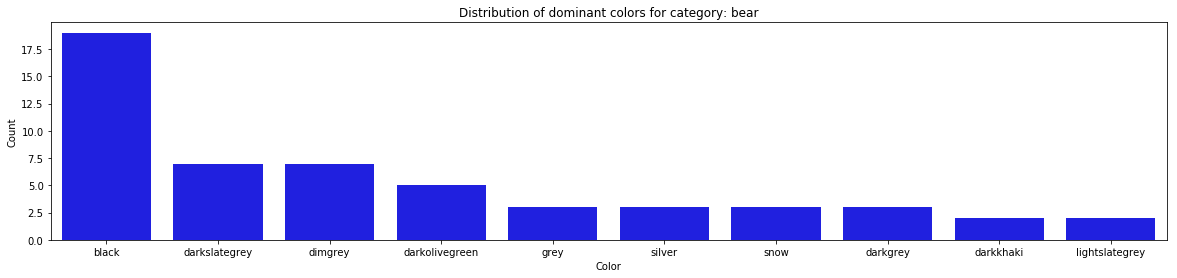

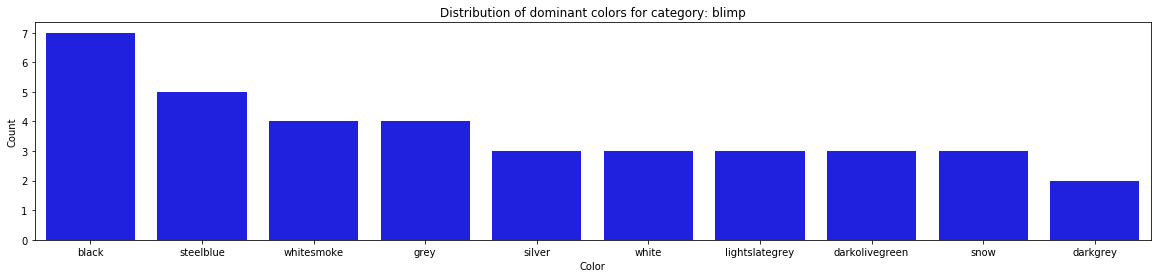

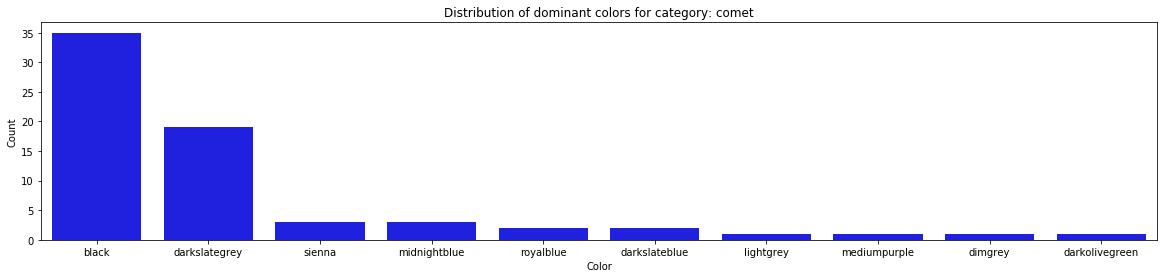

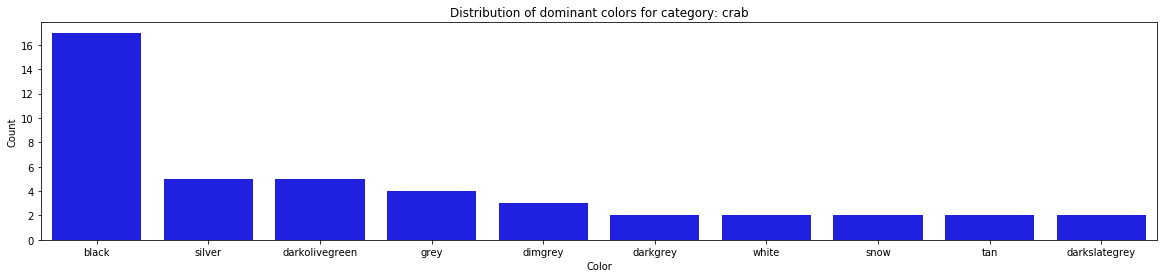

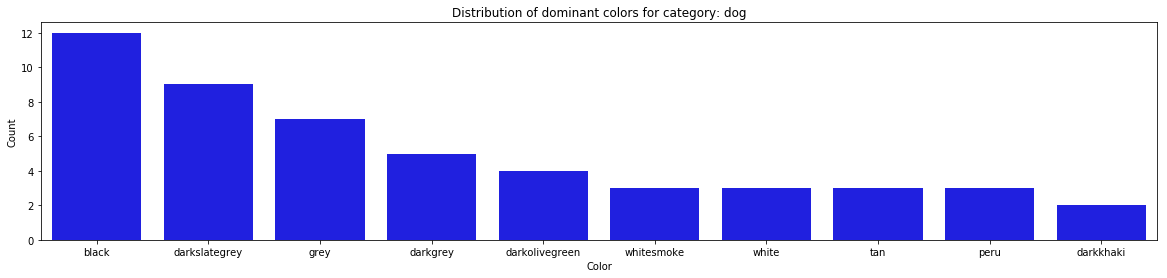

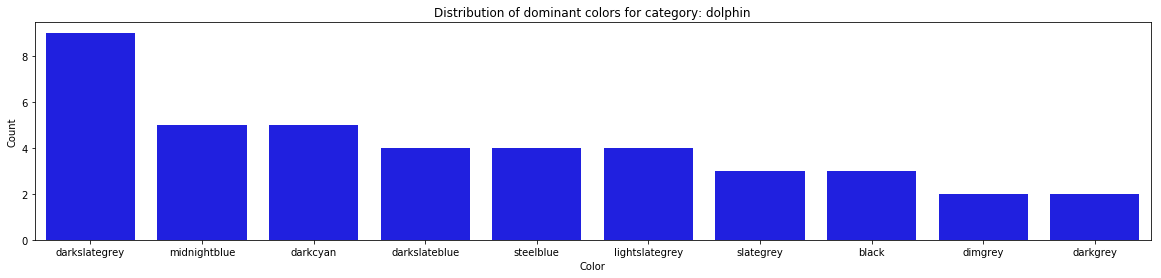

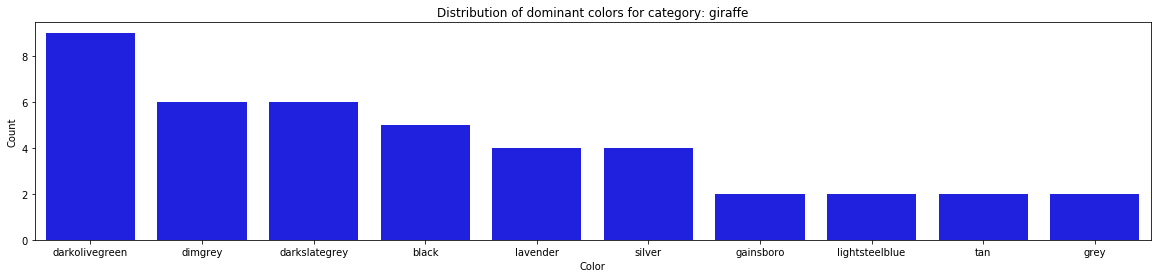

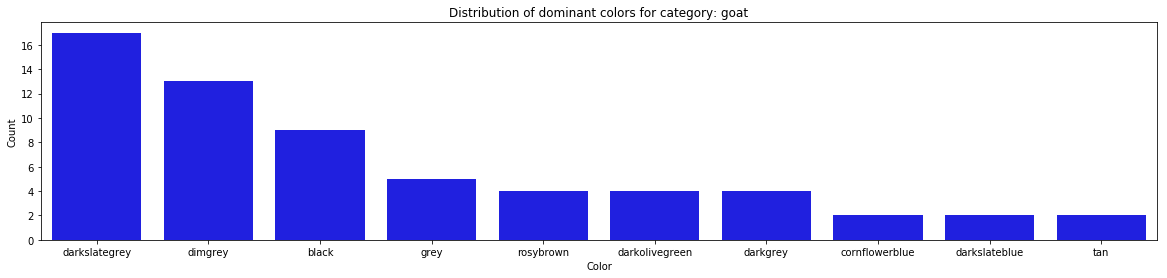

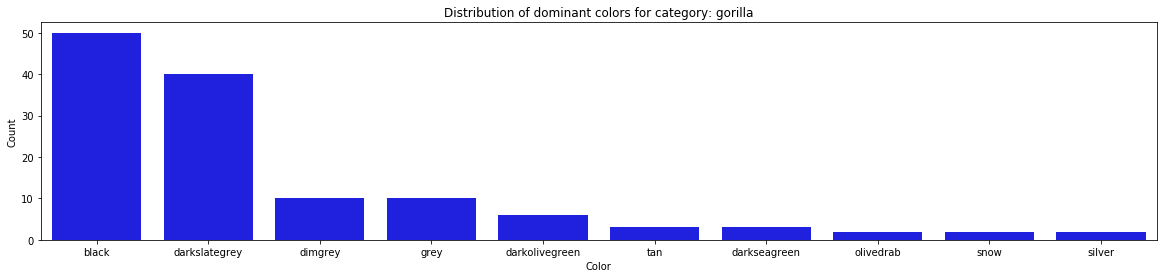

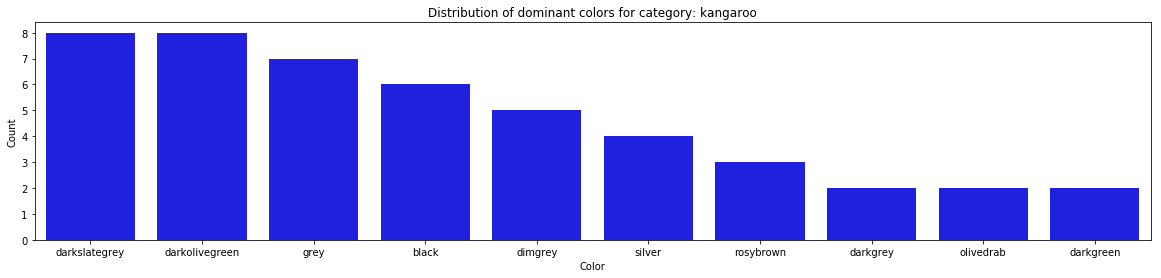

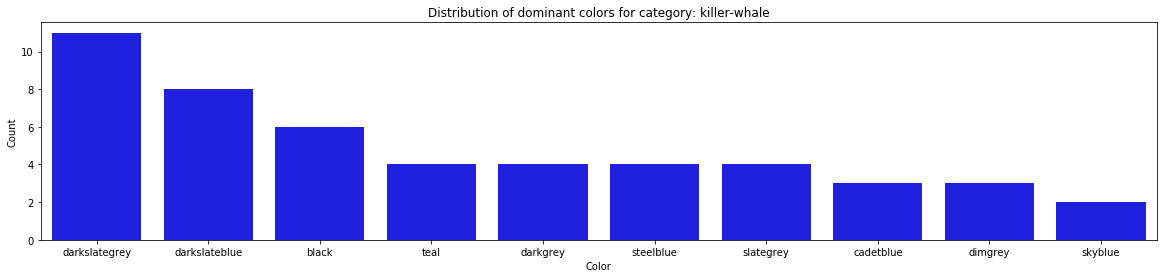

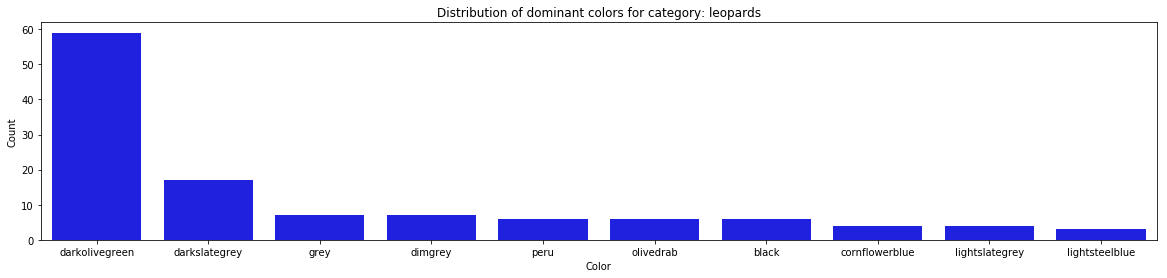

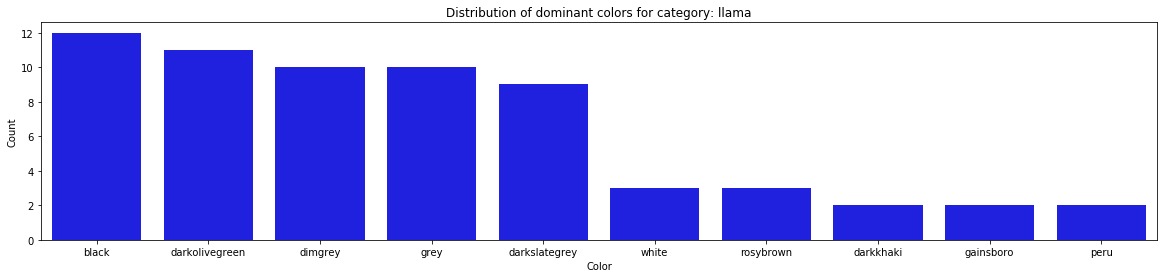

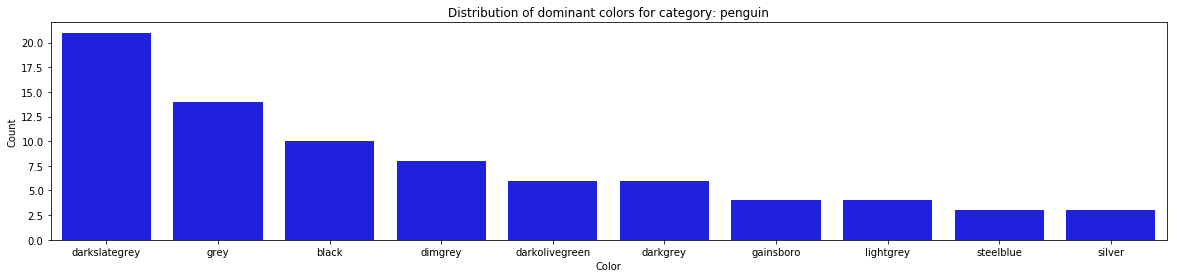

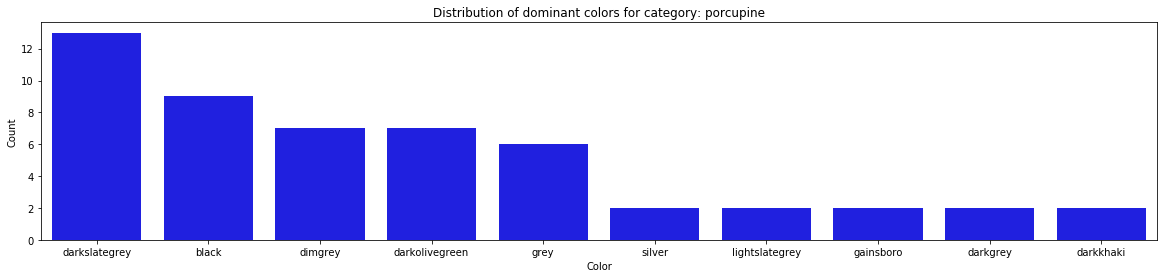

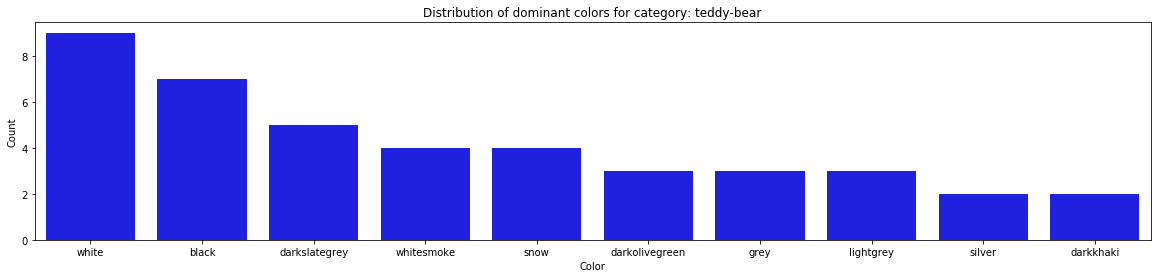

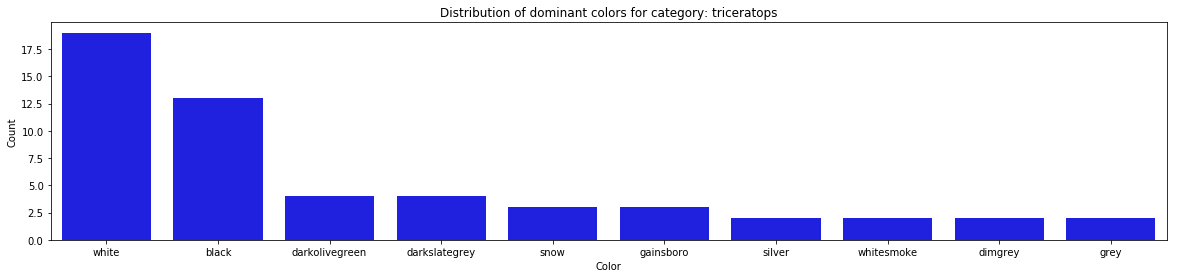

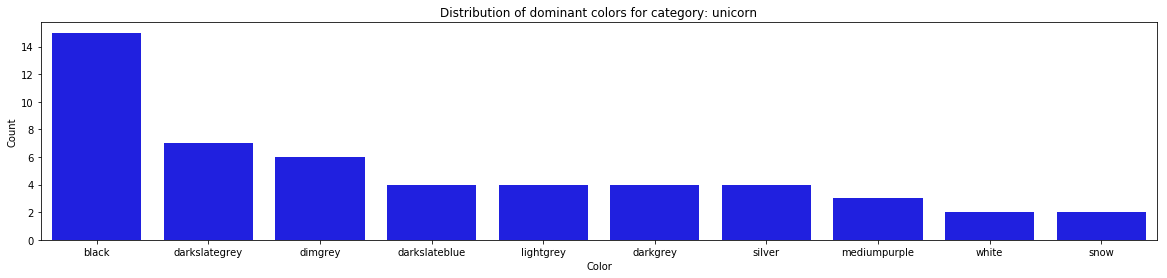

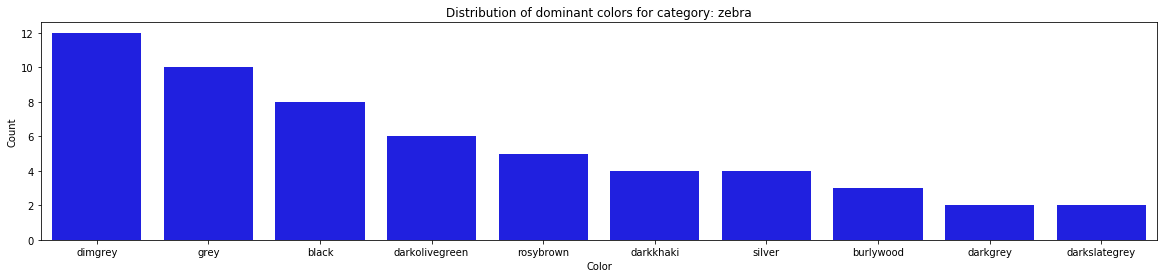

In [7]:
# Distribution of categories 
category_distribution = (training_data['category']
                         .value_counts()
                         .reset_index()
                        ) 
plt.figure(figsize=(20,4))
ax = sns.barplot(x='index', 
                 y='category', 
                 data=category_distribution, 
                color='blue')
ax.set_title('Distribution of image categories')
ax.set_xlabel('Category')
ax.set_ylabel('Count')
plt.show()

# Distribution of colors 
color_distribution = (get_dominant_colors('20_Validation')['color']
                      .value_counts()
                      .nlargest(10)
                      .reset_index()
                     )
plt.figure(figsize=(20,4))
color_plot = sns.barplot(x='index', 
                         y='color', 
                         data=color_distribution,
                         color='blue') 
color_plot.set_title('Distribution of dominant colors')
color_plot.set_xlabel('Color')
color_plot.set_ylabel('Count')
plt.show()

plt.subplots_adjust(bottom=0.1)

# Distribution of colors by category 
ensure_dir("./colors/")
colors_by_category = pd.DataFrame
for category_name in os.listdir('20_categories_training'): # find colors by category 
    if not category_name.startswith('.'): # hidden files 
        print(f"Finding dominant colors for category: {category_name}")
        category_colors = get_dominant_colors(f"20_categories_training/{category_name}", 
                                              cache_file=f'colors/{category_name}_colors.pkl')
        
for category_name in os.listdir('20_categories_training'): # plot colors by category  
    if not category_name.startswith('.'): # hidden files 
        category_colors = pd.read_pickle(f'colors/{category_name}_colors.pkl')
        dominant_category_colors = (category_colors['color']
                                    .value_counts()
                                    .nlargest(10)
                                    .reset_index()) 
        plt.figure(figsize=(20,4))
        color_plot = sns.barplot(x='index', 
                                 y='color', 
                                 data=dominant_category_colors, 
                                 color='blue')
        color_plot.set_title(f'Distribution of dominant colors for category: {category_name}')
        color_plot.set_xlabel('Color')
        color_plot.set_ylabel('Count')
        plt.show()     

<h4> Sources </h4>

https://scikit-image.org/

https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_orb/py_orb.html#orb

https://zeevgilovitz.com/detecting-dominant-colours-in-python

### Featurized Image DataFrame Creation  

In [8]:
#Returns data-frame with all the features now inside, and calculated
def feature_frame(images_df, isTest=False, isCache=True):
    """
    Runs all the feature functions on the image dataframe.
    
    Keyword arguments: 
    images_df (pd.DataFrame) -- DataFrame containing all images
    isTest (bool) -- True featurizes test set, False featurizes train set.
    isCache (bool) -- True loads featurized images from cache if exists, false overwrites. 
    
    Returns: 
        pd.DataFrame with all images and their features 
    """
    num_features = 18
    image_series = images_df['image']
    
    cache_file = 'features_test.pkl' if isTest else 'features_train.pkl'
    if Path(cache_file).is_file() and isCache: 
        return pd.read_pickle(cache_file)
    
    features = [f'ft{x}' for x in range(0, num_features)] 
    for feature in features:
        print(f"Started feature: {feature}")
        start = time.time()
        images_df[feature] = eval(f"np.vectorize({feature})(image_series)")
        print(f"Feature '{feature}' took {round(time.time() - start, 2)} seconds")    
    
    if not Path(cache_file).is_file(): 
        images_df.to_pickle(f"./{cache_file}")
        
    print(f"Featurization of {'test' if isTest else 'train'} set completed!")
        
    return images_df

In [9]:
validation_features_df = feature_frame(validation_data, isTest=True, isCache=True)
training_features_df = feature_frame(training_data, isTest=False, isCache=True)